In [271]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from datetime import datetime
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import plotly.express as px
import statsmodels.api as sm
from scipy import stats
# https://www.python-graph-gallery.com/
# https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html


import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.manifold import MDS
import umap.umap_ as umap

### Exercise 1

The inforgraphic presents an example of an hurricane pattern prediction and explains how to read it. The map in the backgroung creates the setting of the example, with the small US map on the right explaining the area in which the we are focusing. The various lines that are drawn on the map allow to see what were the estimations and predictions for hurricane's movement across Florida. The lines are drawn in a light color and with little opacity so to be recognizable and understandable without being the main highlight of the infographic. Also bolder colors, thicker lines would have disrupted the understanding of the plot, as the lines that overlap could have covered other elements. At the center the NHC prediction was highlighted by coloring it in black and using a full line (instead for dashed).

The red circles with bigger red dot in the center show what are the predicted positions of the hurricane at different points in time. Red was clearly chosen in order to highlight the element, as it is the most important part of the infographic. The last dot is an hurricane which shows the starting point of the storm. Decorating it with a spinning simbol simply emphasizes on the key concept of the hurricane/storm.

The area affected by the hurricane was colored red like the circles to highlight the connection between the hurricane in red and the affected area.

Lastly, text was used to explain the various elements of the infographic. Using black allows the text to show and be the second key element of the infographic.

### Exercise 2

In data visualization, decoration is the use of additional design elements with the purpose of making the infographics more appealing and the communication more effective.
Decoration should always be used in order to facilitate understanding, or highlight focal points and key information. It should not hamper the ability to understand and read the information and should never mislead the reader or enforce the bias of the person creating the infographic.

Following two examples of the use of decoration in infographics.


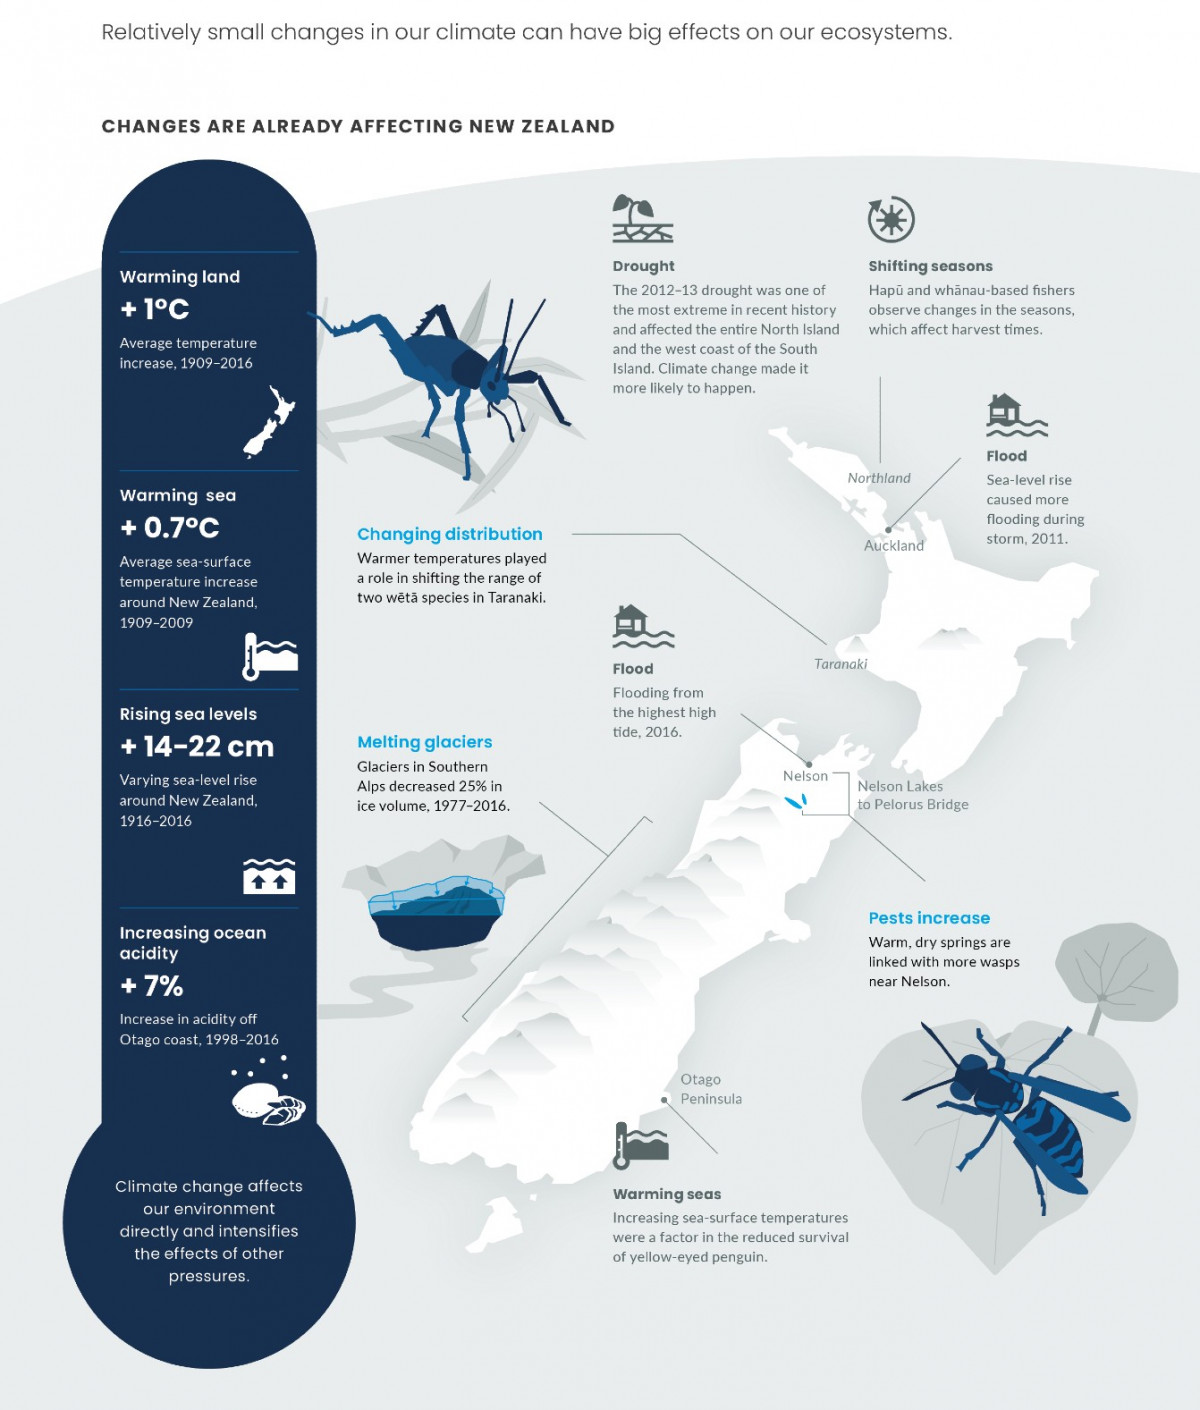

In [272]:
from IPython.display import Image
Image("https://environment.govt.nz/assets/Environmental-Reporting/EA2019_ClimateChange__FitMaxWzEyMDAsMTQxMF0.jpg")

This is an example of a good infographic. Decoration is used to highilight the key concepts: Drought, warming seas, floods and the species of insects that will become more common in the changing ecosystem. The infographic is easily readable and the graphic elements help understanding the various points more quickly.

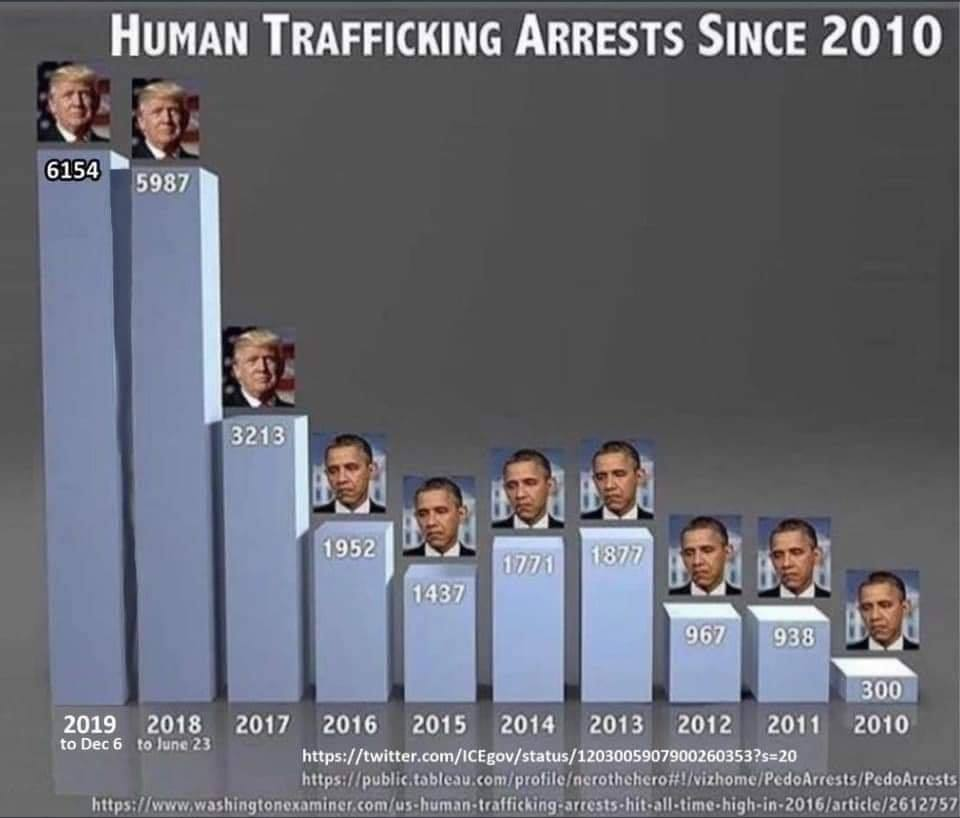

In [273]:
# source: https://venngage.com/blog/bad-infographics/
Image("https://venngage-wordpress.s3.amazonaws.com/uploads/2021/01/humantrafficking.jpg")

Here is a good example of a terrible infographic, that also happens to be poorly decorated. The person that created the plot is implicitly (not so much) trying to enforce their beliefs and bias. By seeing Obama portrayed with a sad face and Trump with pround one, we do know that the person who created the infographic was inherently biased.



### Exercise 3

Discuss in detail the application scope of the PCA dimensionality reduction algorithms for data visualization. Provide also a dataviz example where applying PCA is not appropriate.

PCC is a dimensionality reduction technique that aims at minimizing the information loss, where the information is given by the variance of the data on a certain direction. It is a linear dimensionality reduction method because the dataset in the new feature space is the result of linear combinations of the original dataset (dot product)

PCA creates a new set of variables |x_new| < |x_old| that are uncorrelated and encode the data along the first n principal components. Principal components represent the directions along which the data has the maximal variance. As an example, the first component is the direction with most possible variance in the dataset, the second component the direction with the second highest variance, etc. The first n components form new axes on which the data in the original space can be projected.

PCA can be good for noise reduction and such pre-processing tasks, given that it can help in reducing the dimensions of the data that have little relevance for the information in the data. Although noice can be suppressed only with continuous variables.
Nevertheless, PCA focuses solely on preserving the maximum variance of the data, and preserves little of the structure of the data, both locally and globally. Therefore it might not be appropriate for data exploration.
As an example, see the following:


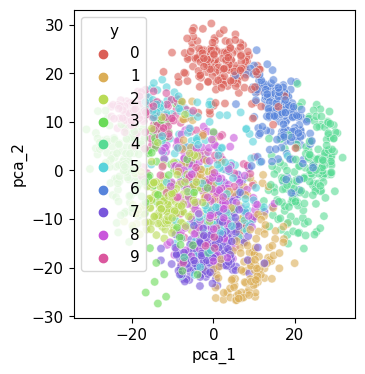

In [274]:
from sklearn.datasets import load_digits
data = load_digits()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df_data = df
df["y"] = data.target
df_data

pca_result = PCA(n_components=3).fit_transform(df_data)

df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1] 
df['pca_3'] = pca_result[:, 2]

plt.figure(figsize=(8, 4))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca_1", y="pca_2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.6,
    ax=ax1
)


plt.show()

We can see that there are some separate, distinguishable clusters. But we can tell little or nothing of the clusters that are mixed up in the center of the plot, where most of the digits are. UMAP or t-SNE do a far better job for exploring the data.

### Exercise 4

In [275]:
import pycountry
df = pd.read_csv("datasets/geonames.csv", sep=";")
# ASCII Name, Population, Coordinates
len(df.Elevation.unique())
# Elevation has lots of values but also lots of NaNs
df.Elevation.fillna(value=-1000, inplace=True) # filling with a value that i can exclude in the next query

#df2 = df.query("Elevation > -1000")
#df2["lat"] = [ x.split(",")[0] for x in df2.Coordinates]
#df2["lon"] = [ x.split(",")[1] for x in df2.Coordinates]

df3 = df.query("Population >= 1000000").groupby(by="Country name EN").count()
df3.drop(columns=df3.columns[1:], inplace=True)
df3.rename(columns={"Geoname ID":"cCount"}, inplace=True)
df3

# manual binning
# categories < 5, >5 < 10, > 10 <20, > 20

cc = list()
for x in df3.cCount:
    if x >= 20:
        cc.append(">= 20")
    elif x >= 10:
        cc.append(">= 10 < 20")
    elif x >= 5:
        cc.append(">= 5 < 10")
    else:
        cc.append("< 5")


df3["Count"] = cc
df3

,cCount,Count
Country name EN,,
Afghanistan,1,< 5
Algeria,1,< 5
Angola,1,< 5
Argentina,2,< 5
Armenia,1,< 5
...,...,...
"Venezuela, Bolivarian Rep. of",5,>= 5 < 10
Viet Nam,2,< 5
Yemen,1,< 5


In [276]:
fig = px.choropleth(df3, locations=df3.index,
                    color="Count", # lifeExp is a column of gapminder
                    hover_name=df3.index, # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    locationmode = "country names",
                    #locationmode="ISO-3",
                    scope='world',
                   )
            
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(
    title_text = "Number of cities with more than 1M population, grouped by nation",
)

fig.show()


#### THE MAP DOESN'T SHOW IN THE HTML! i don't know why -> please look at the ipynb

### Exercise 5
I'm going to first see some general plots, then i'll show a 2x2 summary plot. The other plots are for completeness and documentation.

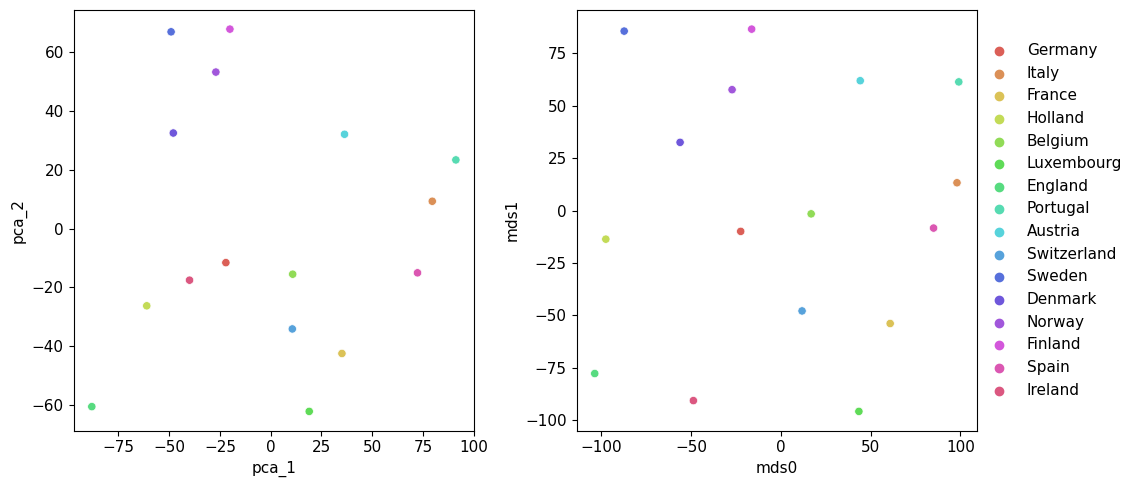

In [277]:
df = pd.read_csv("datasets/food.csv")
df
#there are nans
df.fillna(method="ffill", inplace=True)
# shape 16 x 21
# Country column to be removed
df_data = df.drop(columns="Country")
df_data

pca_result = PCA(n_components=2).fit_transform(df_data)
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1] 

mds_res = MDS(n_components=2, metric=True, normalized_stress='auto').fit_transform(df_data)
df['mds0'] = mds_res[:,0]
df['mds1'] = mds_res[:,1]

nCountries = len(df["Country"]) # 16


fig = plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca_1", y="pca_2",
    hue="Country",
    palette=sns.color_palette("hls", nCountries),
    data=df,
    legend=False,
    alpha=1,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="mds0", y="mds1",
    hue="Country",
    palette=sns.color_palette("hls", nCountries),
    data=df,
    legend="full",
    alpha=1,
    ax=ax2
)

plt.legend(loc='center right', borderpad = -10, frameon=False)
fig.tight_layout()
plt.show()


Here i'm plotting multiple version of t-sne and umap, in order to adjust the hyperparameters
Given the low number of rows in teh datset (16) I've kept the minimum distance fixed to 0.1 to allow the points to aggregate together and i've analyzed three possible number of neighbours 5, 10 and 16 (where 16 are the max neighbours) the n_neighburs should usually be higher, but it is not possible on this dataset.

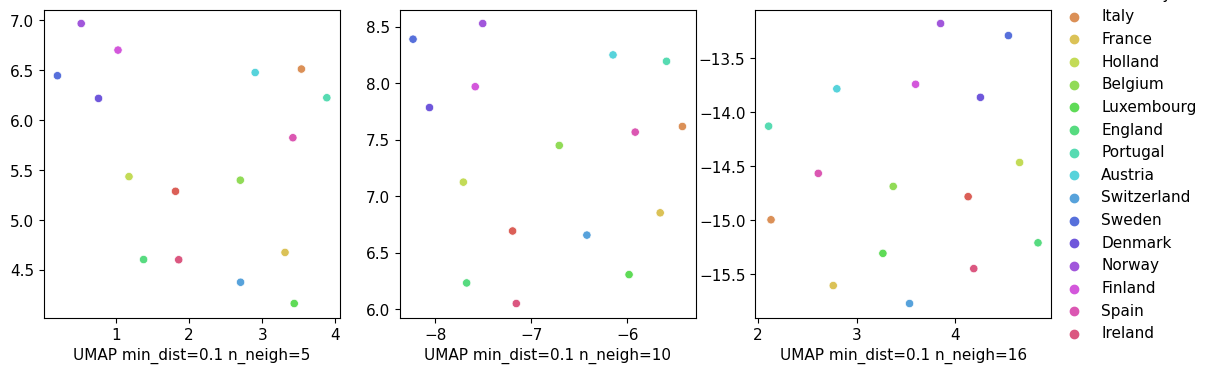

In [278]:
embedding = umap.UMAP(n_neighbors=5, min_dist=0.1, random_state=42).fit(df_data).transform(df_data)
df['umap0'] = embedding[:,0]
df['umap1'] = embedding[:,1]

plt.figure(figsize=(13, 4))

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="umap0", y="umap1",
    hue="Country",
    palette=sns.color_palette("hls", nCountries),
    data=df,
    legend=False,
    alpha=1,
    ax=ax1
)
ax1.set_xlabel(xlabel="UMAP min_dist=0.1 n_neigh=5")
ax1.set_ylabel(ylabel="")

embedding = umap.UMAP(n_neighbors=10, min_dist=0.1, random_state=42).fit(df_data).transform(df_data)
df['umap0'] = embedding[:,0]
df['umap1'] = embedding[:,1]


ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="umap0", y="umap1",
    hue="Country",
    palette=sns.color_palette("hls", nCountries),
    data=df,
    legend=False,
    alpha=1,
    ax=ax2
)
ax2.set_xlabel(xlabel="UMAP min_dist=0.1 n_neigh=10")
ax2.set_ylabel(ylabel="")

embedding = umap.UMAP(n_neighbors=16, min_dist=0.1, random_state=42).fit(df_data).transform(df_data)
df['umap0'] = embedding[:,0]
df['umap1'] = embedding[:,1]

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="umap0", y="umap1",
    hue="Country",
    palette=sns.color_palette("hls", nCountries),
    data=df,
    legend="full",
    alpha=1,
    ax=ax3
)
ax3.set_xlabel(xlabel="UMAP min_dist=0.1 n_neigh=16")
ax3.set_ylabel(ylabel="")


plt.legend(loc='center right', borderpad = -10, frameon=False)
fig.tight_layout()
plt.show()

[t-SNE] Computing 15 nearest neighbors...
[t-SNE] Indexed 16 samples in 0.000s...
[t-SNE] Computed neighbors for 16 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 49.828798
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.310810
[t-SNE] KL divergence after 300 iterations: 1.246120
[t-SNE] Computing 15 nearest neighbors...
[t-SNE] Indexed 16 samples in 0.000s...
[t-SNE] Computed neighbors for 16 samples in 0.110s...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 1346.756504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.015690
[t-SNE] KL divergence after 300 iterations: 0.362204


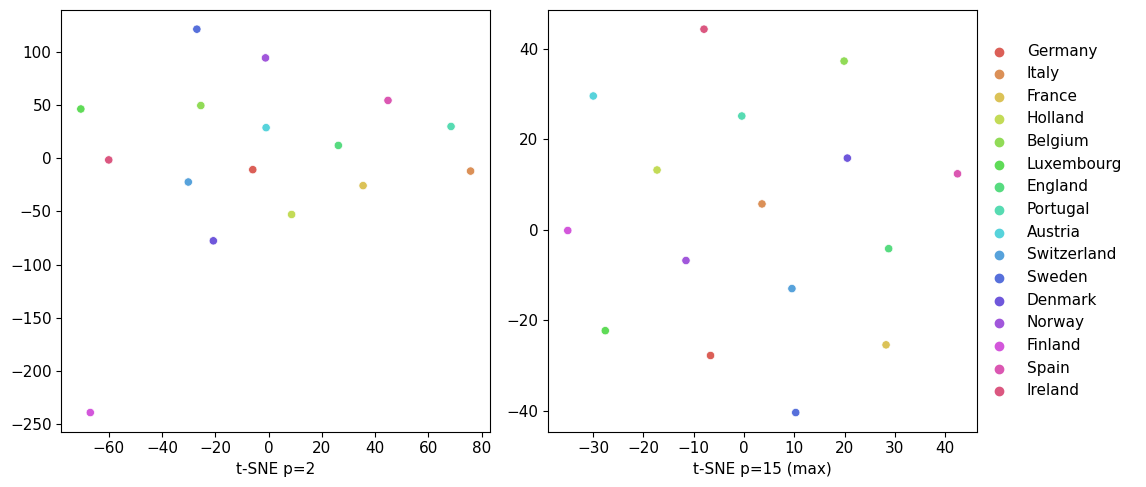

In [279]:

tsne_result = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300).fit_transform(df_data)
df['tsne0'] = tsne_result[:,0]
df['tsne1'] = tsne_result[:,1]


fig = plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="tsne0", y="tsne1",
    hue="Country",
    palette=sns.color_palette("hls", nCountries),
    data=df,
    legend=False,
    alpha=1,
    ax=ax1
)
ax1.set_xlabel(xlabel="t-SNE p=2")
ax1.set_ylabel(ylabel="")

tsne_result = TSNE(n_components=2, verbose=1, perplexity=15, n_iter=300).fit_transform(df_data)
df['tsne0'] = tsne_result[:,0]
df['tsne1'] = tsne_result[:,1]

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne0", y="tsne1",
    hue="Country",
    palette=sns.color_palette("hls", nCountries),
    data=df,
    legend="full",
    alpha=1,
    ax=ax2
)
ax2.set_xlabel(xlabel="t-SNE p=15 (max)")
ax2.set_ylabel(ylabel="")

plt.legend(loc='center right', borderpad = -10, frameon=False)
fig.tight_layout()
plt.show()

#### Summary results

[t-SNE] Computing 15 nearest neighbors...
[t-SNE] Indexed 16 samples in 0.000s...
[t-SNE] Computed neighbors for 16 samples in 0.103s...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 64.174616
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.607780
[t-SNE] KL divergence after 300 iterations: 0.928098


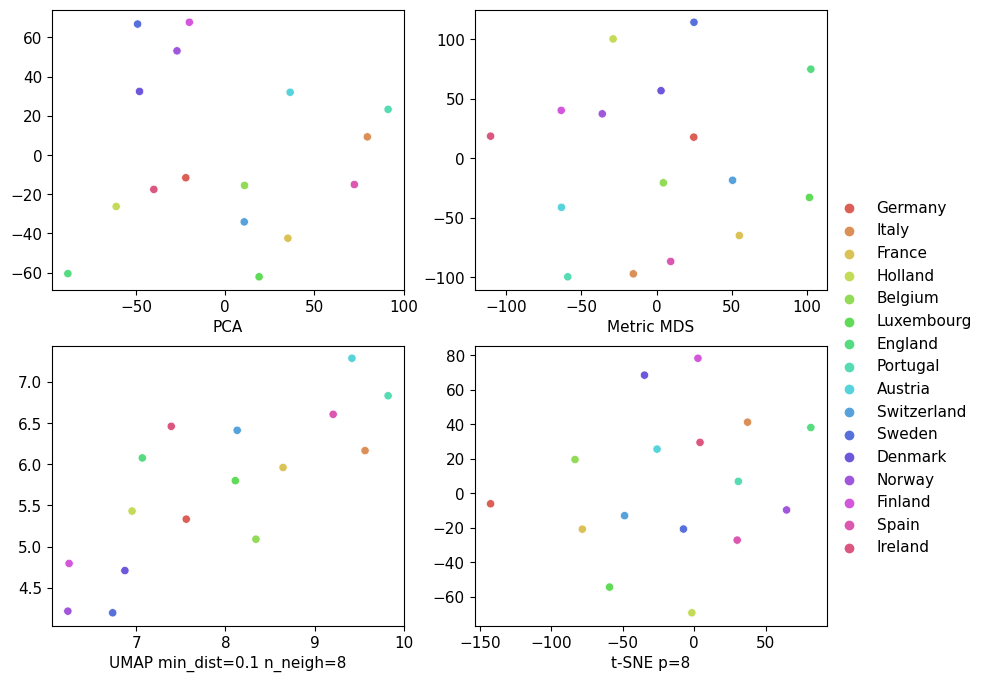

In [280]:
plt.figure(figsize=(10, 8))

pca_result = PCA(n_components=2).fit_transform(df_data)
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1] 

ax1 = plt.subplot(2, 2, 1)
sns.scatterplot(
    x="pca_1", y="pca_2",
    hue="Country",
    palette=sns.color_palette("hls", nCountries),
    data=df,
    legend=False,
    alpha=1,
    ax=ax1
)
ax1.set_xlabel(xlabel="PCA")
ax1.set_ylabel(ylabel="")

mds_res = MDS(n_components=2, metric=True, normalized_stress='auto').fit_transform(df_data)
df['mds0'] = mds_res[:,0]
df['mds1'] = mds_res[:,1]

ax2 = plt.subplot(2, 2, 2)
sns.scatterplot(
    x="mds0", y="mds1",
    hue="Country",
    palette=sns.color_palette("hls", nCountries),
    data=df,
    legend=False,
    alpha=1,
    ax=ax2
)
ax2.set_xlabel(xlabel="Metric MDS")
ax2.set_ylabel(ylabel="")

embedding = umap.UMAP(n_neighbors=8, min_dist=0.1, random_state=42).fit(df_data).transform(df_data)
df['umap0'] = embedding[:,0]
df['umap1'] = embedding[:,1]

ax3 = plt.subplot(2, 2, 3)
sns.scatterplot(
    x="umap0", y="umap1",
    hue="Country",
    palette=sns.color_palette("hls", nCountries),
    data=df,
    legend=False,
    alpha=1,
    ax=ax3
)
ax3.set_xlabel(xlabel="UMAP min_dist=0.1 n_neigh=8")
ax3.set_ylabel(ylabel="")

tsne_result = TSNE(n_components=2, verbose=1, perplexity=8, n_iter=300).fit_transform(df_data)
df['tsne0'] = tsne_result[:,0]
df['tsne1'] = tsne_result[:,1]

ax4 = plt.subplot(2, 2, 4)
sns.scatterplot(
    x="tsne0", y="tsne1",
    hue="Country",
    palette=sns.color_palette("hls", nCountries),
    data=df,
    legend="full",
    alpha=1,
    ax=ax4
)
ax4.set_xlabel(xlabel="t-SNE p=8")
ax4.set_ylabel(ylabel="")


plt.legend(loc='upper right', borderpad = -10, frameon=False)
fig.tight_layout()
plt.show()

I chose to use UMAP with n_neigh=8 and t-SNE with perp=8 beacuse with hiigher perplexities the points are too evenly scattered and do not preserve much of the local structure of the data.
All four algorithms achieve similar results with no substantial differences, apart from the fact that t_SNE with max perplexity (15) is able to show us that the data is rather evenly scattered. 
Take for example Italy and Spain, which we acknowledge have much in common food-wise, they are kept rather close in all of the 4 plots. Similarly, Holland and Belgium are mildly distanced in all of the four plots.

### Exercise 6

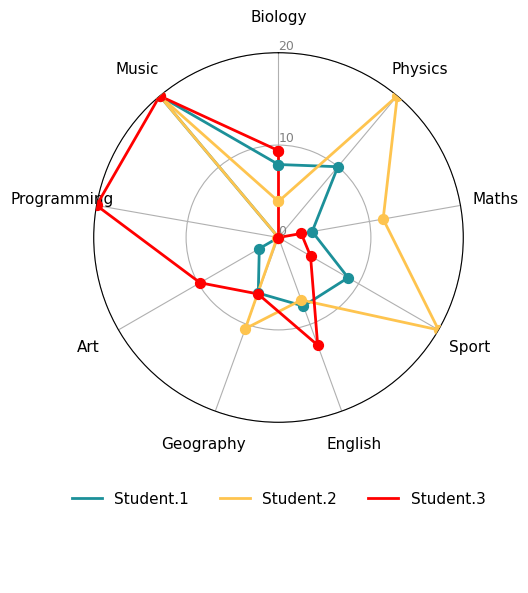

In [281]:
from math import pi

df = pd.read_csv("datasets/radar.csv")
df

plt.rcParams['font.size'] = 11

categories=list(df)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 

plt.xticks(angles[:-1], categories)

ax.tick_params(axis="x", pad=15)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,10,20], ["0","10","20"], color="grey", size=9)
plt.ylim(0,20)


color0 = "#1c9099"
color1 = "#fec44f"
color2 = "red" # #d73027

# plot student 1
stud_ids = df.get('Student')
values= df.loc[0].drop('Student').values.flatten().tolist()
values += values[:1] # need this to close the plot
values
ax.plot(angles, values, linewidth=2, linestyle='solid', label="Student.1", color= color0)
ax.scatter(angles, values, s=50, c=color0, zorder=10) # use scatterplot to add the dots
# ax.fill(angles, values, 'b', alpha=0.15, color= fill0)

# plt stud 2
stud_ids = df.get('Student')
values= df.loc[1].drop('Student').values.flatten().tolist()
values += values[:1] # need this to close the plot
values
ax.plot(angles, values, linewidth=2, linestyle='solid', label="Student.2", color= color1)
ax.scatter(angles, values, s=50, c=color1, zorder=10)

# plt stud 3
stud_ids = df.get('Student')
values= df.loc[2].drop('Student').values.flatten().tolist()
values += values[:1] # need this to close the plot
values
ax.plot(angles, values, linewidth=2, linestyle='solid', label="Student.3", color= color2)
ax.scatter(angles, values, s=50, c=color2, zorder=10)

# Add legend
# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
legend = plt.legend(title='', frameon=False, loc='lower center', borderpad = -6, ncol=3)


# Show the graph
plt.show()
